In [1]:
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import glob
import os
import string
import numpy
import re
import pandas as pd
import multiprocessing
import gensim
import random
from tqdm import tqdm
from gensim.models import KeyedVectors
from adjustText import adjust_text

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
model = KeyedVectors.load_word2vec_format('model-whole.bin', binary = True)

In [3]:
df = pd.read_csv('bigrams_buitenlandsche.csv')

In [4]:
years_ngrams = dict()
years_prod = dict()

for i in range(1,101):
    tmp = df.iloc[:,[0,i]]
    tmp.columns = ['ngram', 'count']
    tmp.count = tmp['count'].astype(int)
    tmp = tmp[tmp.count > 0]
    tmp = list(tmp.ngram)
    years_ngrams.update({list(df.columns)[i]:tmp})
    years_prod.update({list(df.columns)[i]:len(tmp)})

In [6]:
for k,v in years_ngrams.items():
    
    tc = 0
    
    for w in v:
        if w in list(model.vocab.keys()):
            tc += 1
    
    print(str(k) + " " + str(tc) + "/" + str(len(v)))

1815 12/14
1816 31/37
1817 13/14
1818 15/15
1819 25/26
1820 11/12
1821 21/22
1822 32/34
1823 29/31
1824 28/28
1825 20/23
1826 26/29
1827 23/24
1828 23/25
1829 23/28
1830 32/34
1831 34/37
1832 46/51
1833 38/41
1834 48/52
1835 41/44
1836 41/45
1837 32/35
1838 45/53
1839 42/47
1840 33/34
1841 44/50
1842 44/45
1843 49/53
1844 53/57
1845 53/57
1846 43/46
1847 84/94
1848 60/65
1849 57/60
1850 58/65
1851 66/71
1852 81/89
1853 88/94
1854 75/83
1855 90/109
1856 102/119
1857 106/125
1858 133/145
1859 136/146
1860 103/121
1861 106/112
1862 118/130
1863 113/126
1864 102/116
1865 126/137
1866 126/142
1867 151/172
1868 130/142
1869 159/174
1870 100/112
1871 110/121
1872 119/128
1873 97/106
1874 101/107
1875 113/124
1876 105/115
1877 120/133
1878 127/135
1879 138/155
1880 113/135
1881 116/131
1882 154/171
1883 148/169
1884 120/147
1885 111/134
1886 101/123
1887 143/165
1888 146/173
1889 156/194
1890 159/186
1891 151/181
1892 148/188
1893 170/205
1894 127/152
1895 274/427
1896 223/318
1897 220/302
189

In [7]:
def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.wv.vocab)]
    
    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            tmp = model.similarity(word, term)
            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

In [15]:
s = list()

for k,v in years_ngrams.items():
    tmp = DistanceMatrix(v, model)
    tmp[tmp > 0.3] = 1
    tmp[tmp < 0.4] = 0
    tmp = tmp.apply(pd.Series.value_counts)
    n0 = sum(tmp.iloc[0,:])
    n1 = sum(tmp.iloc[1,:])
    total = n0 + n1
    p = n1 / total * 100
    s.append(p)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [17]:
years = list(range(1815,1915))

In [18]:
dfr = pd.DataFrame(s,years, columns = ['s'])

In [19]:
dfr['y'] = list(dfr.index)

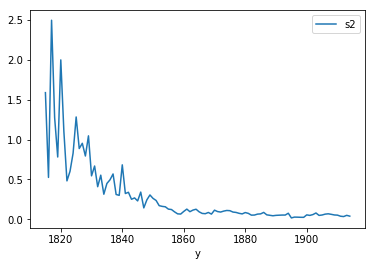

In [44]:
dfr.plot.line(x='y', y='s2')

In [25]:
dfr['prod'] = list(years_prod.values())

In [33]:
dfr['s2'] = dfr['s'] / dfr['prod']

In [42]:
for c,i in enumerate(list(dfr['prod'])):
    dfr['s2'][c] = math.sqrt(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
dfr

,s,y,prod,s2
1815,22.222222,1815,14,1.587302
1816,19.458897,1816,37,0.525916
1817,34.911243,1817,14,2.493660
1818,19.111111,1818,15,1.274074
1819,20.320000,1819,26,0.781538
1820,23.966942,1820,12,1.997245
1821,24.263039,1821,22,1.102865
1822,16.406250,1822,34,0.482537
1823,18.668252,1823,31,0.602202
1824,23.214286,1824,28,0.829082
